In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime
import re
from parse.config import Config
from parse import discover

In [3]:
# generate all CSV files by running the zsh script
def dateparse (time_in_secs):    
    return datetime.datetime.fromtimestamp(float(time_in_secs))

files = discover.group(discover.discover('./results'))

# driver_name = "nullrdc" | "contiki-mac" | "tsch" (or with "-full" suffix)
def plot_driver(driver_name):

    datas = []
        
    configs = files[driver_name]
    for config_path in configs:
        try:
            config = Config.load(config_path)
        except:
            continue
            
        #fig, axs = plt.subplots(1, 3, figsize=(15, 7))
        for node in config.all_nodes:
            if node.consumption.exists():
                df = node.conso_dataframe()
                
                datas.append({
                    "driver_name": driver_name,
                    "exp_id": config.prefix.name,
                    "node_id": node.uid,
                    "type": node.type.name,
                    "power_avg": df["power"].mean(),
                    "voltage_avg": df["voltage"].mean(),
                    "current_avg": df["current"].mean(),
                })
                continue
                
                df["power"].rolling(10).mean().plot(
                    label="m3-%d #%s (%s)" % (node.num, node.uid, node.type.name),
                    legend=True,
                    ax=axs[0]
                )
                
                df["voltage"].rolling(10).mean().plot(
                    label="m3-%d #%s (%s)" % (node.num, node.uid, node.type.name),
                    legend=True,
                    ax=axs[1]
                )
                
                df["current"].rolling(10).mean().plot(
                    label="m3-%d #%s (%s)" % (node.num, node.uid, node.type.name),
                    legend=True,
                    ax=axs[2]
                )
                
                axs[0].set_title('Puissance', fontsize=16)
                axs[0].set_ylabel('Puissance (W)')
                axs[0].set_xlabel('Temps (s)')
                
                axs[1].set_title('Voltage', fontsize=16)
                axs[1].set_ylabel('Voltage (V)')
                axs[1].set_xlabel('Temps (s)')
                
                axs[2].set_title('Courrant', fontsize=16)
                axs[2].set_ylabel('Courrant (A)')
                axs[2].set_xlabel('Temps (s)')
        #fig.suptitle('Expérience #%s' % (config.prefix.name), fontsize=20)
        #plt.show()
    return datas
        
all_datas = []

# reg = re.compile(r'^coap://\[[0-9a-f:]+::([0-9a-f]+)\]\/.*')
# df = pd.read_csv("coap_stats.csv", index_col="timestamp",date_parser=dateparse, parse_dates=True)
# df["uid"] = df.request_url.replace(reg, r'\1')
# df.head(10)

# Consommation

## NullRDC

In [4]:
all_datas += plot_driver("nullrdc")

## NullRDC (full)

In [5]:
all_datas += plot_driver("nullrdc-full")

## Contiki-mac

In [6]:
all_datas += plot_driver("contiki-mac")

## Contiki-mac (full)

In [7]:
all_datas += plot_driver("contiki-mac-full")

## TSCH

In [8]:
all_datas += plot_driver("tsch")

## TSCH (full)

In [9]:
all_datas += plot_driver("tsch-full")

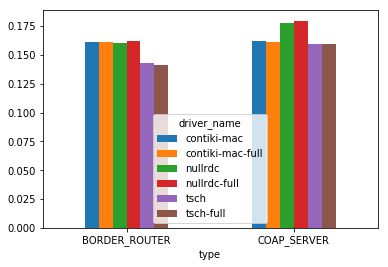

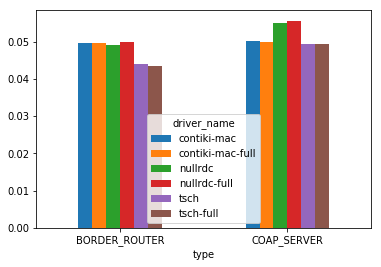

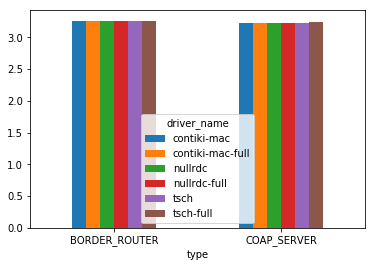

In [27]:
df = pd.DataFrame(all_datas)
df.groupby(['type', 'driver_name']).mean()['power_avg'].unstack().plot.bar(rot=0)
df.groupby(['type', 'driver_name']).mean()['current_avg'].unstack().plot.bar(rot=0)
df.groupby(['type', 'driver_name']).mean()['voltage_avg'].unstack().plot.bar(rot=0)

In [11]:
# one = df[(df["status_code"] == 0)]

In [12]:
# one.request_time.hist(by=one.uid, bins=10)